## USE CASE 1: Platforms' Performance and Drivers Quality

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# pd: 2.2.3
# np: 1.26.4
# pip install --upgrade 'numpy<2.0' 'pandas>=2.2'

In [2]:
rides = pd.read_parquet("output/rides/part-00001-193ccff4-1e19-4de4-9351-59157676afbd-c000.snappy.parquet")
print(rides.columns)
rides.head()

Index(['event_id', 'ride_id', 'event_type', 'timestamp', 'user_id',
       'driver_id', 'pickup_latitude', 'pickup_longitude', 'pickup_address',
       'pickup_city', 'dropoff_latitude', 'dropoff_longitude',
       'dropoff_address', 'dropoff_city', 'distance_km',
       'estimated_duration_minutes', 'actual_duration_minutes', 'vehicle_type',
       'base_fare', 'surge_multiplier', 'total_fare', 'payment_method',
       'payment_status', 'payment_id', 'user_to_driver_rating',
       'driver_to_user_rating', 'user_comment', 'driver_comment',
       'canceled_by', 'cancellation_reason', 'cancellation_fee',
       'traffic_level', 'estimated_delay_minutes', 'driver_latitude',
       'driver_longitude', 'driver_heading', 'driver_speed_kmh', 'app_version',
       'platform', 'session_id'],
      dtype='object')


,event_id,ride_id,event_type,timestamp,user_id,driver_id,pickup_latitude,pickup_longitude,pickup_address,pickup_city,...,cancellation_fee,traffic_level,estimated_delay_minutes,driver_latitude,driver_longitude,driver_heading,driver_speed_kmh,app_version,platform,session_id
0,840635ac913c_2,R-09d4bf5d2f,RIDE_CANCELED_BY_USER,2024-12-31 23:49:37.316,U000030,None,40.416877,-3.703627,7474 Calle de Preciados,Madrid,...,0.0,LOW,0,NaN,NaN,NaN,NaN,4.6.0,iOS,S-6c16a1af
1,45c96b673223_1,R-c1ef09ad51,RIDE_REQUESTED,2024-12-31 23:16:07.125,U000050,None,40.461389,-3.676637,5422 Paseo de la Castellana,Madrid,...,NaN,LOW,0,NaN,NaN,NaN,NaN,4.6.2,Android,S-045d15d5
2,45c96b673223_3,R-c1ef09ad51,DRIVER_ARRIVED,2024-12-31 23:22:36.197,U000050,D000080,40.461389,-3.676637,5422 Paseo de la Castellana,Madrid,...,NaN,LOW,0,40.461389,-3.676637,7.502028,0.000000,4.6.2,Android,S-045d15d5
3,45c96b673223_4,R-c1ef09ad51,RIDE_STARTED,2024-12-31 23:25:35.251,U000050,D000080,40.461389,-3.676637,5422 Paseo de la Castellana,Madrid,...,NaN,LOW,0,40.461389,-3.676637,186.922989,19.497059,4.6.2,Android,S-045d15d5
4,06ab4b16e582_1,R-502467a203,RIDE_REQUESTED,2024-12-31 23:41:37.327,U000265,None,40.416805,-3.703621,5922 Plaza del Sol,Madrid,...,NaN,LOW,0,NaN,NaN,NaN,NaN,4.5.2,iOS,S-99e21808


In [3]:
special = pd.read_parquet("output/specials/part-00000-61ebba59-2335-4486-9e73-f3e95ffdebd6-c000.snappy.parquet")
print(special.columns)
special.head()

Index(['event_type', 'event_name', 'venue_zone', 'venue_latitude',
       'venue_longitude', 'venue_address', 'venue_city', 'event_start',
       'event_end', 'arrivals_start', 'arrivals_end', 'departures_start',
       'departures_end', 'arrival_rides', 'departure_rides',
       'estimated_attendees'],
      dtype='object')


,event_type,event_name,venue_zone,venue_latitude,venue_longitude,venue_address,venue_city,event_start,event_end,arrivals_start,arrivals_end,departures_start,departures_end,arrival_rides,departure_rides,estimated_attendees
0,sports,Atlético de Madrid vs Sevilla FC Game,malasana,40.426498,-3.7025,301 Sports Stadium,Madrid,2025-01-01 16:00:00,2025-01-01 19:00:00,2025-01-01 14:00:00,2025-01-01 16:15:00,2025-01-01 18:45:00,2025-01-01 20:30:00,3113,4003,37080
1,concert,Concert Event 2,airport,40.498299,-3.5676,598 Airport Calle,Madrid,2025-01-01 19:00:00,2025-01-01 22:00:00,2025-01-01 16:00:00,2025-01-01 19:15:00,2025-01-01 21:30:00,2025-01-02 00:00:00,2090,2351,8004
2,concert,Concert Event 2,airport,40.498299,-3.5676,598 Airport Calle,Madrid,2025-01-01 19:00:00,2025-01-01 22:00:00,2025-01-01 16:00:00,2025-01-01 19:15:00,2025-01-01 21:30:00,2025-01-02 00:00:00,2090,2351,8004
3,sports,Atlético de Madrid vs Sevilla FC Game,malasana,40.426498,-3.7025,301 Sports Stadium,Madrid,2025-01-01 16:00:00,2025-01-01 19:00:00,2025-01-01 14:00:00,2025-01-01 16:15:00,2025-01-01 18:45:00,2025-01-01 20:30:00,3113,4003,37080


### Basic Statistics

In [8]:
# Assume "rides" and "special" DataFrames are already loaded.
# Convert 'timestamp' (rides) from milliseconds to datetime
rides['event_time'] = pd.to_datetime(rides['timestamp'], unit='ms')

# Convert relevant time columns in special events to datetime
special['event_start'] = pd.to_datetime(special['event_start'])
special['event_end'] = pd.to_datetime(special['event_end'])
special['arrivals_start'] = pd.to_datetime(special['arrivals_start'])
special['arrivals_end'] = pd.to_datetime(special['arrivals_end'])
special['departures_start'] = pd.to_datetime(special['departures_start'])
special['departures_end'] = pd.to_datetime(special['departures_end'])

In [27]:
# Compute unique ride IDs from different event types:
requested_ids = set(rides[rides['event_type'] == 'RIDE_REQUESTED']['ride_id'])
completed_ids = set(rides[rides['event_type'] == 'RIDE_COMPLETED']['ride_id'])
canceled_ids  = set(rides[rides['event_type'].isin(['RIDE_CANCELED_BY_USER', 
                                                     'RIDE_CANCELED_BY_DRIVER'])]['ride_id'])

# Raw union of terminal ride IDs (these include all ride IDs that appear in completed or canceled events)
terminal_all = completed_ids.union(canceled_ids)
print("Raw union of terminal ride IDs (not restricted to requested):", len(terminal_all))

# Restrict the terminal rides only to those that were actually requested:
terminal_ids = requested_ids.intersection(terminal_all)
print("Terminal rides (unique, that were requested):", len(terminal_ids))

# Active rides are those requested that are not in the terminal set:
active_ids = requested_ids - terminal_ids
print("Active rides (unique):", len(active_ids))

# Optionally, print the totals for reference:
print("Total rides requested (unique):", len(requested_ids))
print("Total rides completed (unique):", len(completed_ids))
print("Total rides canceled (unique):", len(canceled_ids))


Raw union of terminal ride IDs (not restricted to requested): 789
Terminal rides (unique, that were requested): 183
Active rides (unique): 568
Total rides requested (unique): 751
Total rides completed (unique): 639
Total rides canceled (unique): 150


In [28]:
# -------------------------------
# Driver Response Time (in minutes)
# -------------------------------
# Compute time from RIDE_REQUESTED to DRIVER_ASSIGNED

# Filter the rides for the needed events from the same DataFrame:
requested_df = rides[rides['event_type'] == 'RIDE_REQUESTED'][['ride_id', 'event_time']]
assigned_df  = rides[rides['event_type'] == 'DRIVER_ASSIGNED'][['ride_id', 'event_time']]

# Merge requested and assigned events on ride_id
response_df = pd.merge(requested_df, assigned_df, on='ride_id', suffixes=('_requested', '_assigned'))

# Compute response time in seconds then convert to minutes
response_df['response_time_sec'] = (response_df['event_time_assigned'] - response_df['event_time_requested']).dt.total_seconds()
response_df['response_time_min'] = response_df['response_time_sec'] / 60.0
avg_response_time_min = response_df['response_time_min'].mean()

print("Average driver response time (min):", avg_response_time_min)


# -------------------------------
# Ride Duration (in minutes)
# -------------------------------
# Compute time from RIDE_STARTED to RIDE_COMPLETED

# Filter the rides for the needed events:
started_df  = rides[rides['event_type'] == 'RIDE_STARTED'][['ride_id', 'event_time']]
completed_df = rides[rides['event_type'] == 'RIDE_COMPLETED'][['ride_id', 'event_time']]

# Merge started and completed events on ride_id
duration_df = pd.merge(started_df, completed_df, on='ride_id', suffixes=('_started', '_completed'))

# Compute ride duration in seconds then convert to minutes
duration_df['ride_duration_sec'] = (duration_df['event_time_completed'] - duration_df['event_time_started']).dt.total_seconds()
duration_df['ride_duration_min'] = duration_df['ride_duration_sec'] / 60.0
avg_ride_duration_min = duration_df['ride_duration_min'].mean()

print("Average ride duration (min):", avg_ride_duration_min)

Average driver response time (min): 0.2965545138888889
Average ride duration (min): 12.051948051948052


### Windows Statistics

/var/folders/tg/8k_dxcxj2tlgnqhv569wql7r0000gn/T/ipykernel_11893/778549235.py:23: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  rides_per_hour = rides_requested.resample('H')['ride_id'].nunique()


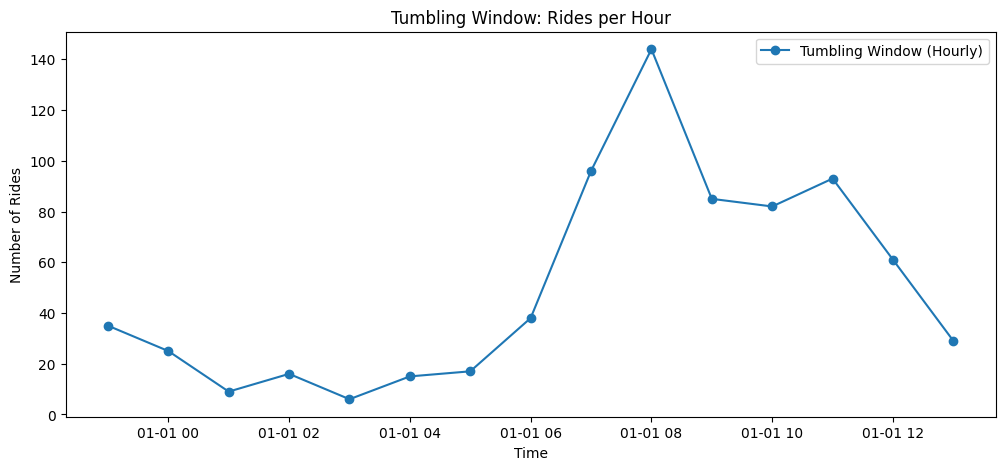

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------
# Preprocessing: Convert timestamp and sort by event_time
# -------------------------------
# Assume your "rides" DataFrame is already loaded.
rides['event_time'] = pd.to_datetime(rides['timestamp'], unit='ms')
rides.sort_values('event_time', inplace=True)

# -------------------------------
# Filter for RIDE_REQUESTED events
# -------------------------------
rides_requested = rides[rides['event_type'] == 'RIDE_REQUESTED'].copy()

# Set event_time as the index
rides_requested.set_index('event_time', inplace=True)

# -------------------------------
# Tumbling Window: Number of Rides per Hour
# -------------------------------
# Compute counts in non-overlapping hourly buckets
rides_per_hour = rides_requested.resample('H')['ride_id'].nunique()

# Plot tumbling window results
plt.figure(figsize=(12, 5))
plt.plot(rides_per_hour.index, rides_per_hour.values, marker='o', label='Tumbling Window (Hourly)')
plt.xlabel('Time')
plt.ylabel('Number of Rides')
plt.title('Tumbling Window: Rides per Hour')
plt.legend()
plt.show()



/var/folders/tg/8k_dxcxj2tlgnqhv569wql7r0000gn/T/ipykernel_11893/1264299886.py:29: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  efficiency_per_minute = completed_rides['efficiency_ratio'].resample('1T').mean()


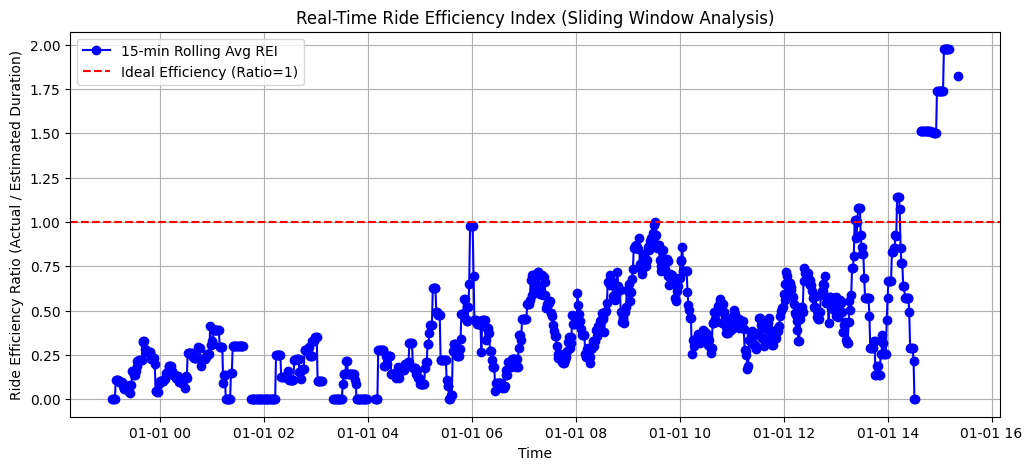

Rolling average efficiency (15-minute window):
count    935.000000
mean       0.411756
std        0.346810
min        0.000000
25%        0.181417
50%        0.332431
75%        0.556024
max        1.974359
Name: efficiency_ratio, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------
# Preprocessing: Convert timestamp and filter completed rides
# -------------------------------
# Assume your "rides" DataFrame is already loaded.
# Convert the "timestamp" (ms) to a datetime column "event_time"
rides['event_time'] = pd.to_datetime(rides['timestamp'], unit='ms')

# Filter for completed rides
completed_rides = rides[rides['event_type'] == 'RIDE_COMPLETED'].copy()

# Make sure we remove cases where estimated_duration_minutes might be zero (avoid division by zero)
completed_rides = completed_rides[completed_rides['estimated_duration_minutes'] > 0]

# -------------------------------
# Compute the Ride Efficiency Ratio (REI) for each completed ride
# -------------------------------
# REI is defined as the ratio of actual to estimated duration
completed_rides['efficiency_ratio'] = completed_rides['actual_duration_minutes'] / completed_rides['estimated_duration_minutes']

# -------------------------------
# Set event_time as index and resample into 1-minute buckets
# -------------------------------
completed_rides.set_index('event_time', inplace=True)

# Resample to 1-minute intervals. For each minute, compute the mean efficiency ratio
efficiency_per_minute = completed_rides['efficiency_ratio'].resample('1T').mean()

# -------------------------------
# Create a sliding window: Rolling average efficiency ratio over a 15-minute window
# -------------------------------
# This rolling window updates every minute
rolling_efficiency = efficiency_per_minute.rolling(window=15, min_periods=1).mean()

# -------------------------------
# Plot the Ride Efficiency Index over time
# -------------------------------
plt.figure(figsize=(12, 5))
plt.plot(rolling_efficiency.index, rolling_efficiency.values, marker='o', linestyle='-', color='b', label='15-min Rolling Avg REI')
plt.axhline(y=1.0, color='r', linestyle='--', label='Ideal Efficiency (Ratio=1)')
plt.xlabel('Time')
plt.ylabel('Ride Efficiency Ratio (Actual / Estimated Duration)')
plt.title('Real-Time Ride Efficiency Index (Sliding Window Analysis)')
plt.legend()
plt.grid(True)
plt.show()

# Optionally, print summary statistics
print("Rolling average efficiency (15-minute window):")
print(rolling_efficiency.describe())

#A rolling window of 15 minutes is applied to the 1-minute aggregated series. The rolling function computes a continuously updated average of the efficiency ratio over the past 15 minutes.


### Driver Quality in the System

Summary by Driver Category:
  driver_category  avg_response_time_min  avg_completed_rides  \
0          Bronze               0.288891             6.673469   
1            Gold               0.298422             3.250000   
2          Silver               0.313988             6.809524   

   avg_ride_duration_min  driver_count  
0               8.796599            49  
1               6.800000             8  
2              11.453889            42  
Category: Bronze
  Average Response Time (min): 0.29
  Average Completed Rides: 6.67
  Average Ride Duration (min): 8.80
  Total Drivers: 49
------------------------------------------
Category: Gold
  Average Response Time (min): 0.30
  Average Completed Rides: 3.25
  Average Ride Duration (min): 6.80
  Total Drivers: 8
------------------------------------------
Category: Silver
  Average Response Time (min): 0.31
  Average Completed Rides: 6.81
  Average Ride Duration (min): 11.45
  Total Drivers: 42
----------------------------------------

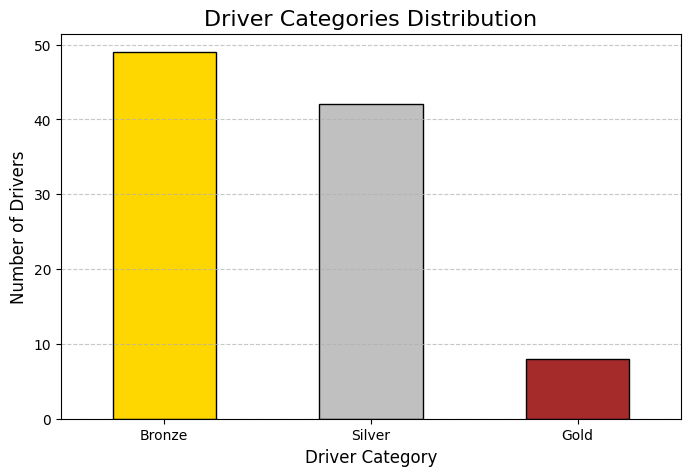

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

###########################################
# 1. DRIVER CATEGORIZATION BASED ON USER RATING
###########################################
# Compute average rating per driver using the 'user_to_driver_rating' column.
# Only consider rows where a rating is available.
avg_driver_rating = rides[rides['user_to_driver_rating'].notna()].groupby('driver_id')['user_to_driver_rating'].mean()

# Define a categorization function
def categorize_rating(rating):
    if rating >= 4.5:
        return 'Gold'
    elif rating >= 4.0:
        return 'Silver'
    else:
        return 'Bronze'

# Apply categorization and create a DataFrame with driver categories.
driver_category = avg_driver_rating.apply(categorize_rating).rename('driver_category')
driver_category_df = driver_category.reset_index()



###########################################
# 2. AVERAGE DRIVER RESPONSE TIME (in minutes)
###########################################
# Convert the 'timestamp' (milliseconds) to a datetime column 'event_time'
rides['event_time'] = pd.to_datetime(rides['timestamp'], unit='ms')

# Filter events for RIDE_REQUESTED and DRIVER_ASSIGNED.
requested_df = rides[rides['event_type'] == 'RIDE_REQUESTED'][['ride_id', 'event_time']]
assigned_df  = rides[rides['event_type'] == 'DRIVER_ASSIGNED'][['ride_id', 'event_time', 'driver_id']]

# Merge on ride_id to compute the response time per ride.
df_response = pd.merge(requested_df, assigned_df, on='ride_id', suffixes=('_requested', '_assigned'))
df_response['response_time_sec'] = (df_response['event_time_assigned'] - df_response['event_time_requested']).dt.total_seconds()
df_response['response_time_min'] = df_response['response_time_sec'] / 60.0

# Compute average response time per driver.
avg_response_per_driver = df_response.groupby('driver_id')['response_time_min'].mean().reset_index()
avg_response_per_driver.rename(columns={'response_time_min': 'avg_response_time_min'}, inplace=True)

###########################################
# 3. TOTAL NUMBER OF COMPLETED RIDES PER DRIVER
###########################################
# Compute number of completed rides (RIDE_COMPLETED) per driver.
completed_by_driver = rides[rides['event_type'] == 'RIDE_COMPLETED'].groupby('driver_id')['ride_id'].nunique().reset_index()
completed_by_driver.rename(columns={'ride_id': 'completed_rides'}, inplace=True)


###########################################
# 4. AVERAGE RIDE DURATION PER DRIVER (in minutes)
###########################################
# Filter rides for RIDE_STARTED and RIDE_COMPLETED events.
started_df  = rides[rides['event_type'] == 'RIDE_STARTED'][['ride_id', 'event_time', 'driver_id']]
completed_df = rides[rides['event_type'] == 'RIDE_COMPLETED'][['ride_id', 'event_time']]

# Merge by ride_id (assuming driver_id remains the same from start to complete).
df_duration = pd.merge(started_df, completed_df, on='ride_id', suffixes=('_started', '_completed'))
df_duration['ride_duration_sec'] = (df_duration['event_time_completed'] - df_duration['event_time_started']).dt.total_seconds()
df_duration['ride_duration_min'] = df_duration['ride_duration_sec'] / 60.0

# Compute average ride duration per driver.
avg_duration_per_driver = df_duration.groupby('driver_id')['ride_duration_min'].mean().reset_index()
avg_duration_per_driver.rename(columns={'ride_duration_min': 'avg_ride_duration_min'}, inplace=True)


###########################################
# 5. MERGE DRIVER METRICS WITH DRIVER CATEGORY
###########################################
# Merge the computed metrics: driver category, avg response time, number of completed rides, and avg ride duration.
driver_metrics = driver_category_df.merge(avg_response_per_driver, on='driver_id', how='left') \
                                   .merge(completed_by_driver, on='driver_id', how='left') \
                                   .merge(avg_duration_per_driver, on='driver_id', how='left')

###########################################
# 6. AGGREGATE METRICS BY DRIVER CATEGORY
###########################################
# For each driver category, compute:
# - Average response time (min)
# - Average number of completed rides
# - Average ride duration (min)
# - Count of drivers in that category
category_summary = driver_metrics.groupby('driver_category').agg(
    avg_response_time_min=('avg_response_time_min', 'mean'),
    avg_completed_rides=('completed_rides', 'mean'),
    avg_ride_duration_min=('avg_ride_duration_min', 'mean'),
    driver_count=('driver_id', 'nunique')
).reset_index()

print("Summary by Driver Category:")
print(category_summary)

# Also print detailed metrics per category in a readable format.
for _, row in category_summary.iterrows():
    print(f"Category: {row['driver_category']}")
    print(f"  Average Response Time (min): {row['avg_response_time_min']:.2f}")
    print(f"  Average Completed Rides: {row['avg_completed_rides']:.2f}")
    print(f"  Average Ride Duration (min): {row['avg_ride_duration_min']:.2f}")
    print(f"  Total Drivers: {row['driver_count']}")
    print("------------------------------------------")

###########################################
# 7. VISUALIZE DRIVER CATEGORIES DISTRIBUTION
###########################################
# Count the number of drivers in each category.
driver_category_counts = driver_category_df['driver_category'].value_counts()

plt.figure(figsize=(8, 5))
# Use custom colors for the categories.
driver_category_counts.plot(kind='bar', color=['gold', 'silver', 'brown'], edgecolor='black')
plt.title("Driver Categories Distribution", fontsize=16)
plt.xlabel("Driver Category", fontsize=12)
plt.ylabel("Number of Drivers", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

